### Download 3K custom data

In [ ]:
# download custom data
! gdown --id 1sVSAJgmOhZk6UG7EzmlRjXfkzPxmpmLy
! unzip customdata.zip

Streaming output truncated to the last 5000 lines.
  inflating: customdata/images/Jimg076.jpg  
  inflating: customdata/images/Jimg077.jpg  
  inflating: customdata/images/Jimg078.jpg  
  inflating: customdata/images/Jimg079.jpg  
  inflating: customdata/images/Jimg080.jpg  
  inflating: customdata/images/Jimg081.jpg  
  inflating: customdata/images/Jimg082.jpg  
  inflating: customdata/images/Jimg083.jpg  
  inflating: customdata/images/Jimg084.jpg  
  inflating: customdata/images/Jimg085.jpg  
  inflating: customdata/images/Jimg086.jpg  
 extracting: customdata/images/Jimg087.jpg  
  inflating: customdata/images/Jimg088.jpg  
  inflating: customdata/images/Jimg089.jpg  
  inflating: customdata/images/Jimg090.jpg  
  inflating: customdata/images/Jimg091.jpg  
  inflating: customdata/images/Jimg092.jpg  
  inflating: customdata/images/Jimg093.jpg  
  inflating: customdata/images/Jimg094.jpg  
  inflating: customdata/images/Jimg095.jpg  
  inflating: customdata/images/Jimg096.jpg  
  in

### Download custom 100 images

In [ ]:
# download new 100 images custom data
! mkdir custom_data100
! unzip /content/custom_data100.zip -d custom_data100

mkdir: cannot create directory ‘custom_data100’: File exists
Archive:  /content/custom_data100.zip
   creating: custom_data100/Labels/
   creating: custom_data100/Labels/boots/
   creating: custom_data100/Labels/mask/
   creating: custom_data100/Labels/hardhat/
   creating: custom_data100/Labels/vest/
  inflating: custom_data100/Labels/boots/6993109694_6480a9e93c_b.txt  
  inflating: custom_data100/Labels/boots/10787437335_d8b61b4697_b.txt  
  inflating: custom_data100/Labels/boots/11019097443_abb9fae2c0_b.txt  
  inflating: custom_data100/Labels/boots/15804770471_20d0b09178_b.txt  
  inflating: custom_data100/Labels/boots/10448136286_bba459ff58_b.txt  
  inflating: custom_data100/Labels/boots/15808239512_47457290d6.txt  
  inflating: custom_data100/Labels/boots/2076622653_ec7c7d4ef0_b.txt  
  inflating: custom_data100/Labels/boots/15804769531_5a38d82555.txt  
  inflating: custom_data100/Labels/boots/24142866007_eb792c43c5_b.txt  
  inflating: custom_data100/Labels/boots/10756024525_c8

### Import Packages

In [ ]:
from utils import *
import warnings
from IPython.display import Image, clear_output 


warnings.filterwarnings('ignore')
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.9.0+cu102 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15109MB, multi_processor_count=40)


### Get File Names

In [ ]:
classes = ["boots", "hardhat", "mask", "vest"]
all_names, l_names = get_image_labels(classes)

### Copy 100 images to custom folder

In [ ]:
copy_custom()

### Trim file path

In [ ]:
trim_names(all_names, l_names)

### Write custom names to train.txt

In [ ]:
train_path = "/content/customdata/train.txt"
write_to_traintxt(train_path, all_names)

# Clone YoloV3 Repo

In [ ]:
! git clone https://github.com/theschoolofai/YoloV3.git

Cloning into 'YoloV3'...
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (156/156), 12.74 MiB | 41.42 MiB/s, done.
Resolving deltas: 100% (7/7), done.


### Move files to YOLO data folder

In [ ]:
! rm -r /content/YoloV3/data/customdata
! cp -r /content/customdata /content/YoloV3/data

### Download YOLO weights

In [ ]:
! gdown --id 1UcR-zVoMs7DH5dj3N1bswkiQTA4dmKF4
! mkdir YoloV3/weights
! cp /content/yolov3-spp-ultralytics.pt /content/YoloV3/weights

Downloading...
From: https://drive.google.com/uc?id=1UcR-zVoMs7DH5dj3N1bswkiQTA4dmKF4
To: /content/yolov3-spp-ultralytics.pt
252MB [00:03, 78.5MB/s]


In [ ]:
cd YoloV3/

/content/YoloV3


In [ ]:
!ls

 annotation_tool   output	  results.txt	     train.py
 cfg		   __pycache__	  test_batch0.png   'ubdivisions=1'
 data		   README.md	  test.py	     utils
 detect.py	   results.json   ting		     vim.exe.stackdump
 models.py	   results.png	  train_batch0.png   weights


### Train Model

In [ ]:
! python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 200 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=200, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

2021-07-22 17:23:58.007464: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
Caching labels (2961 found, 134 missing, 39 empty, 0 duplicate, for 3134 images): 100% 3134/3134 [00:00<00:00, 6784.57it/s]
Caching images (1.7GB): 100% 3134/3134 [00:24<00:00, 129.26it/s]
Caching labels (297 found, 14 missing, 7 empty, 0 duplicate, for 318 images): 100% 318/318

# Run Inference on Images

In [ ]:
!python detect.py --conf-thres 0.3 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
image 1/3690 data/customdata/images/01-prince-boots - Copy.jpg: 512x448 Done. (0.044s)
image 2/3690 data/customdata/images/

### View Predictions on custom images

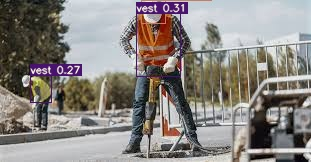

In [ ]:
Image(filename='out_out/C98.jpg', width=600)

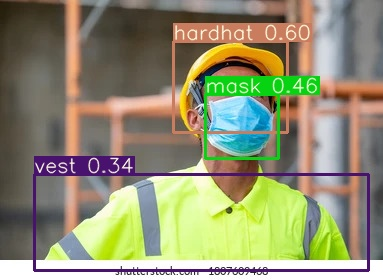

In [ ]:
Image(filename='out_out/construction-worker-wear-protective-face-260nw-1807609468.jpg', width=600)

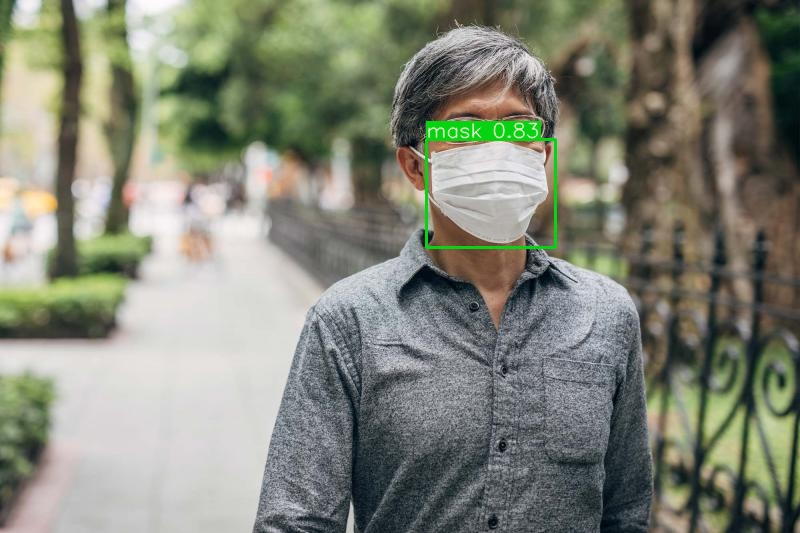

In [ ]:
Image(filename='out_out/hero-man-walking-down-street-with-face-mask-2000x1333.jpg', width=600)

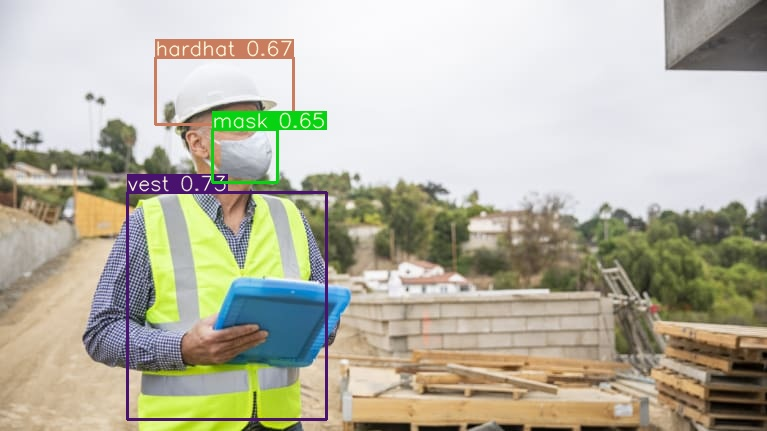

In [ ]:
Image(filename='out_out/Construction_Manager_Wearing_a_Mask_wz8mwg.jpg', width=600)

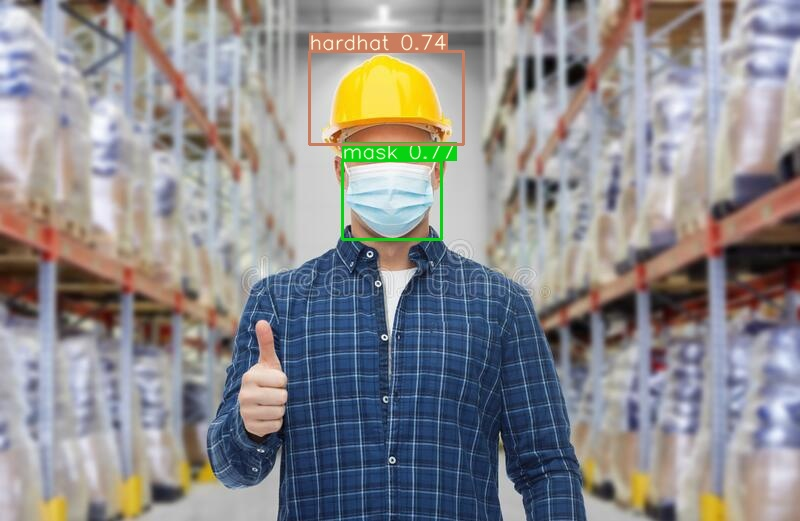

In [ ]:
Image(filename='out_out/male-worker-wearing-face-mask-warehouse-health-protection-safety-pandemic-concept-helmet-protective-medical-over-178402054.jpg', width=600)

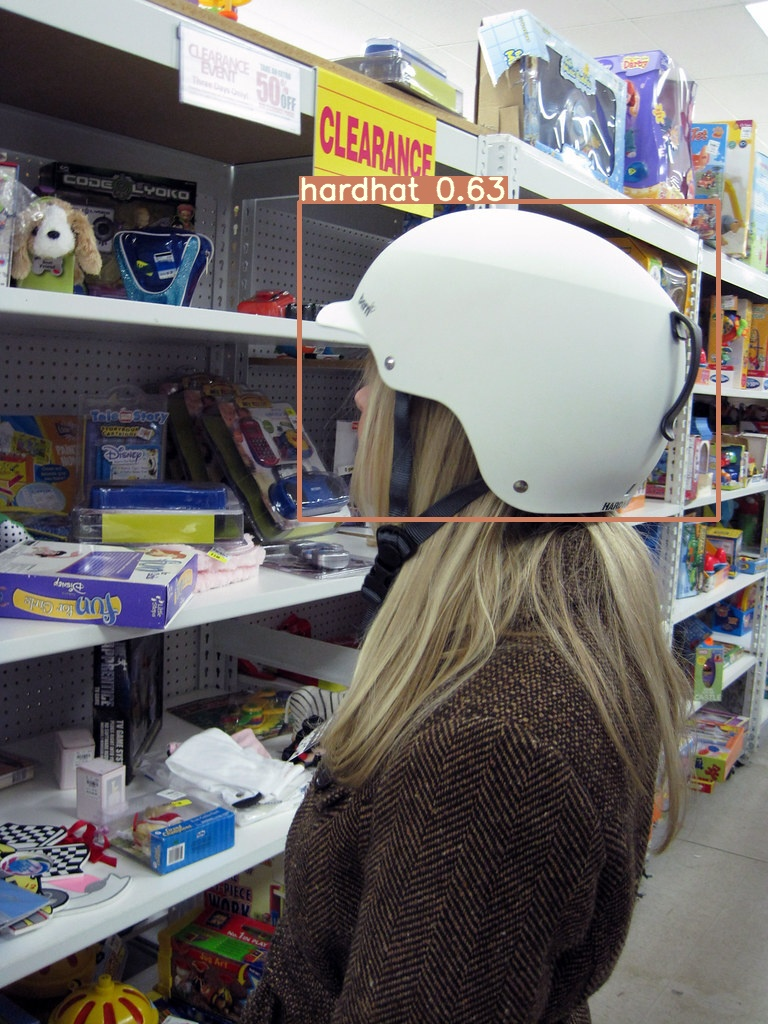

In [ ]:
Image(filename='out_out/4230981015_4e1e560de4_b.jpg', width=600)

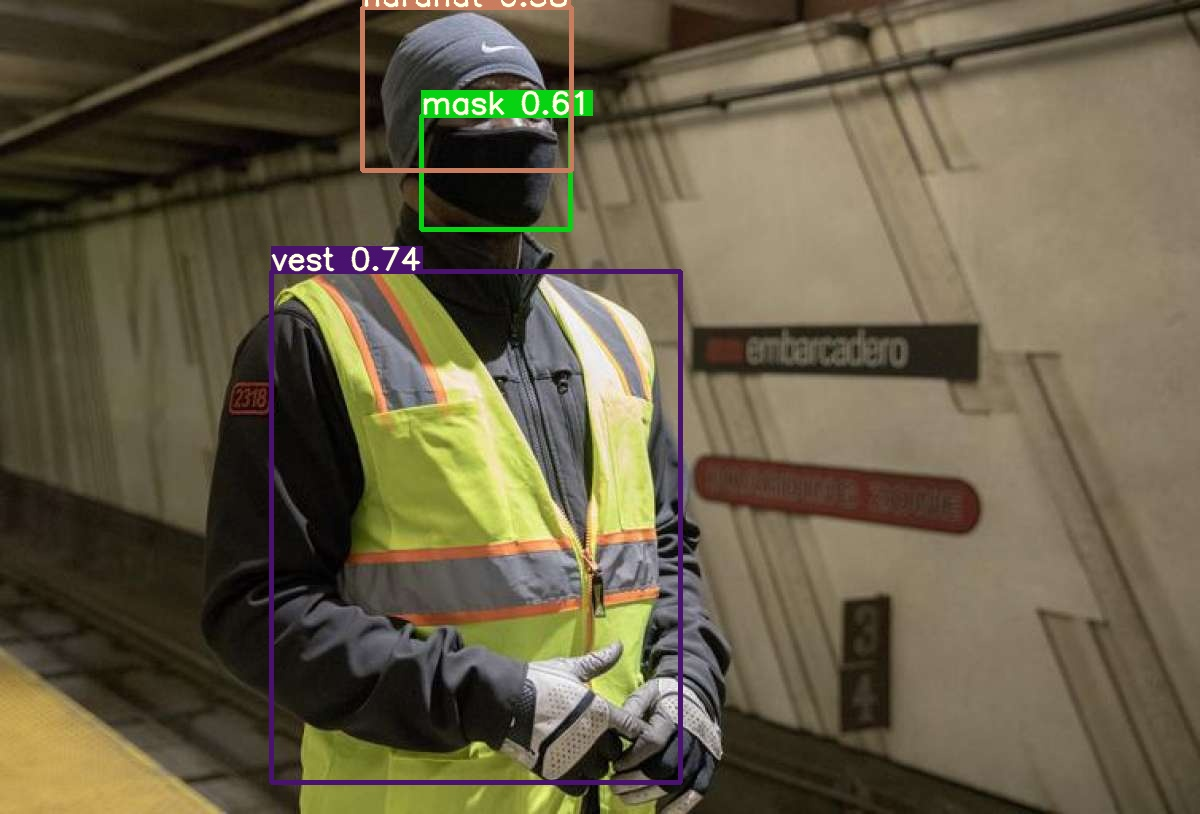

In [ ]:
Image(filename='out_out/1200x0.jpg', width=600)

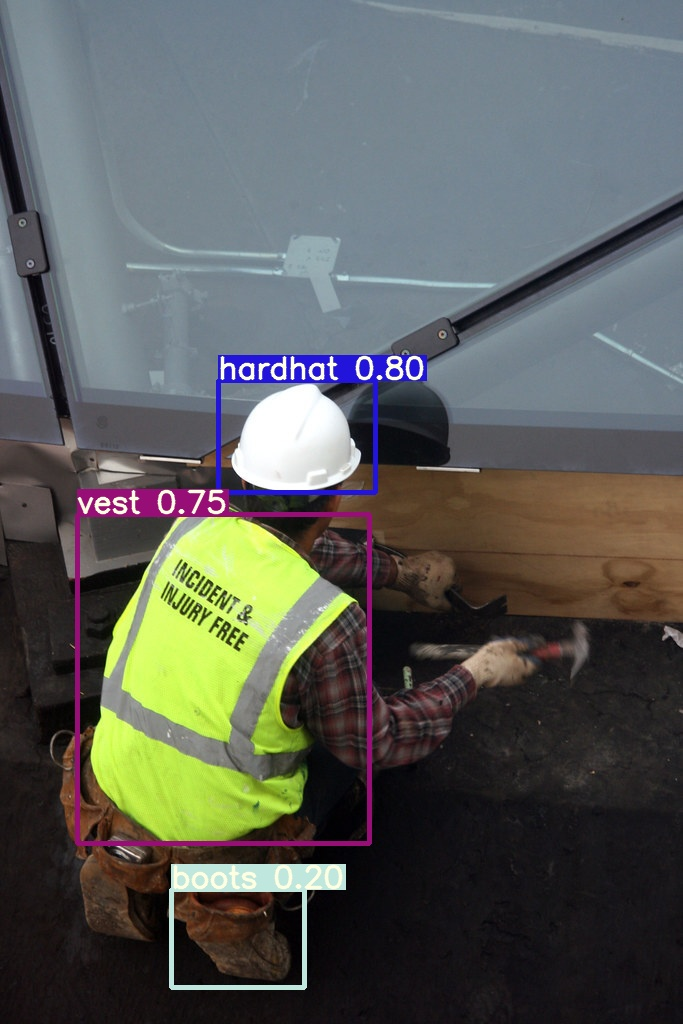

In [ ]:
Image(filename='out_out/5010201739_3eb250241f_b.jpg', width=600)

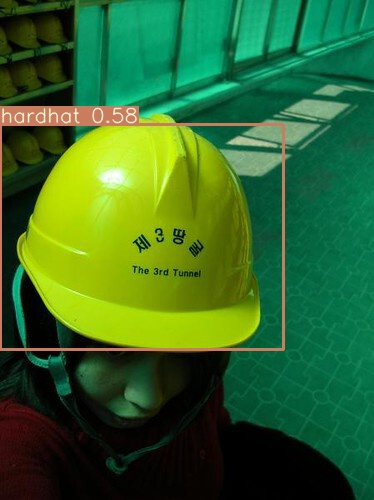

In [ ]:
Image(filename='out_out/2000836776_49cd804de2.jpg', width=600)

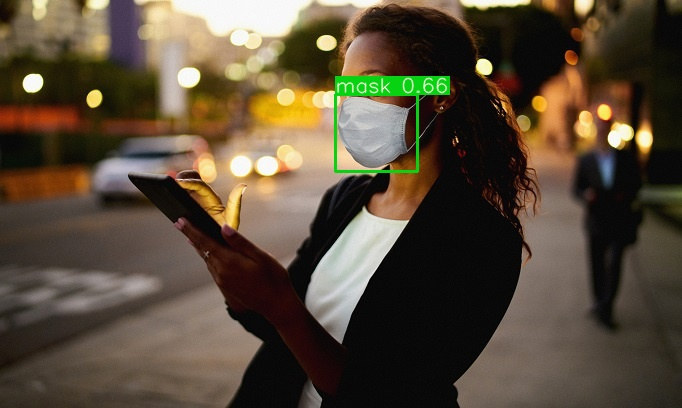

In [ ]:
Image(filename='out_out/Face masks 682x408.jpg', width=600)

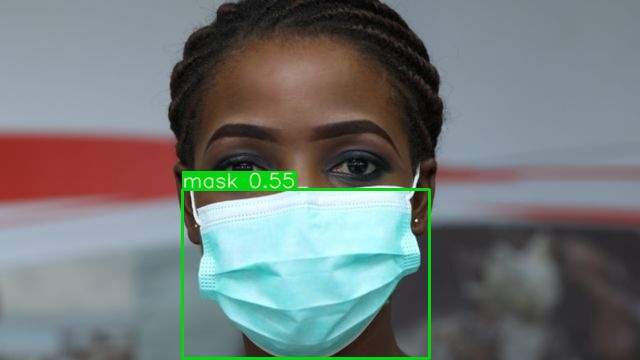

In [ ]:
Image(filename='out_out/_111373895_nkayforlife.jpg', width=600)

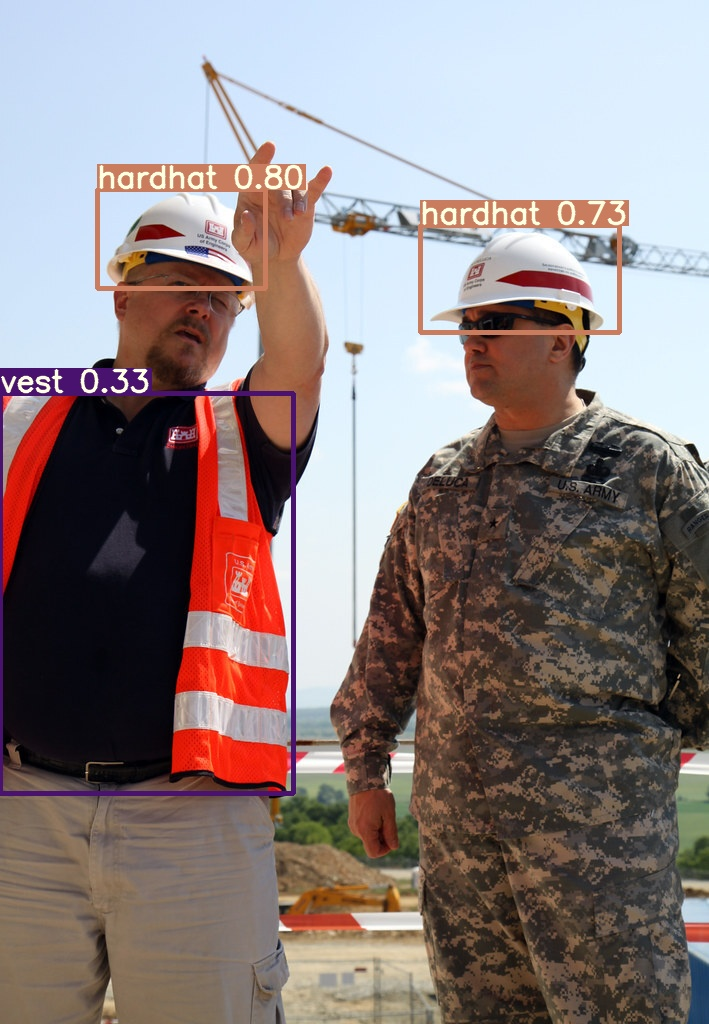

In [ ]:
Image(filename='out_out/4614576445_1bc93a9b76_b.jpg', width=600)

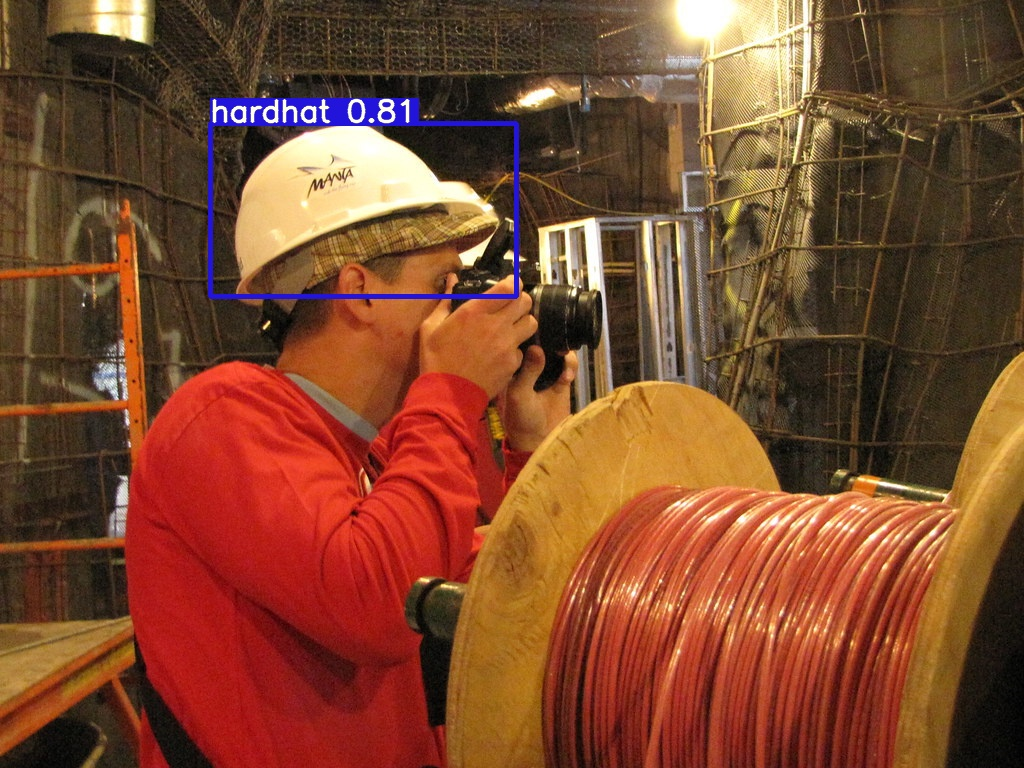

In [ ]:
Image(filename='out_out/3266515899_f5ea6d2ce1_b.jpg', width=600)

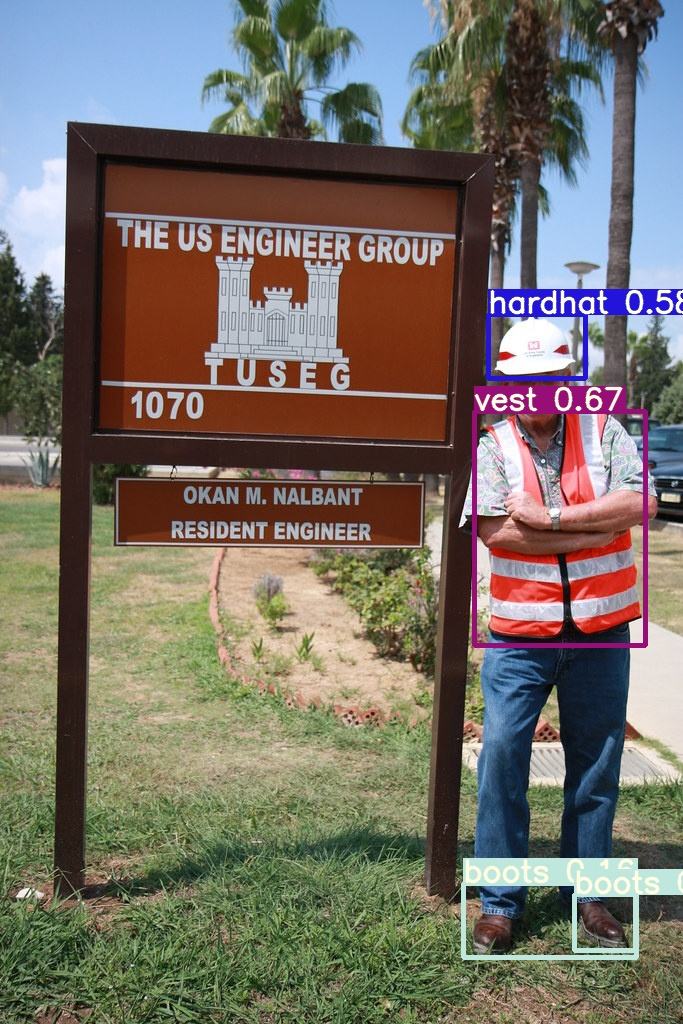

In [ ]:
Image(filename='out_out/3725963057_259c2d9194_b.jpg', width=600)

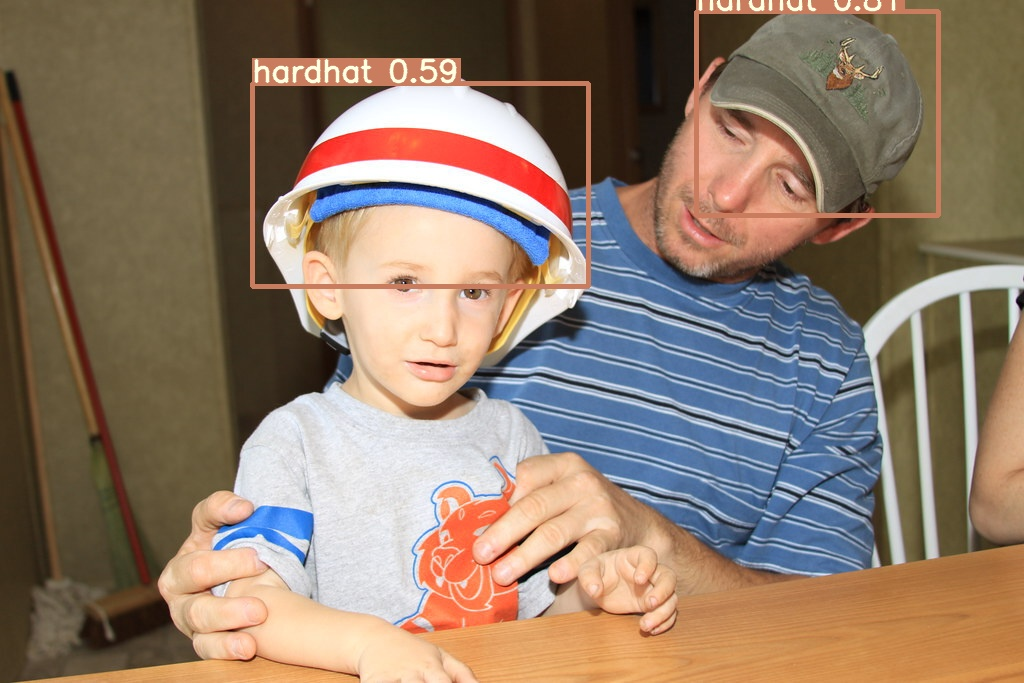

In [ ]:
Image(filename='out_out/5741058888_ae8fdeb13e_b.jpg', width=600)

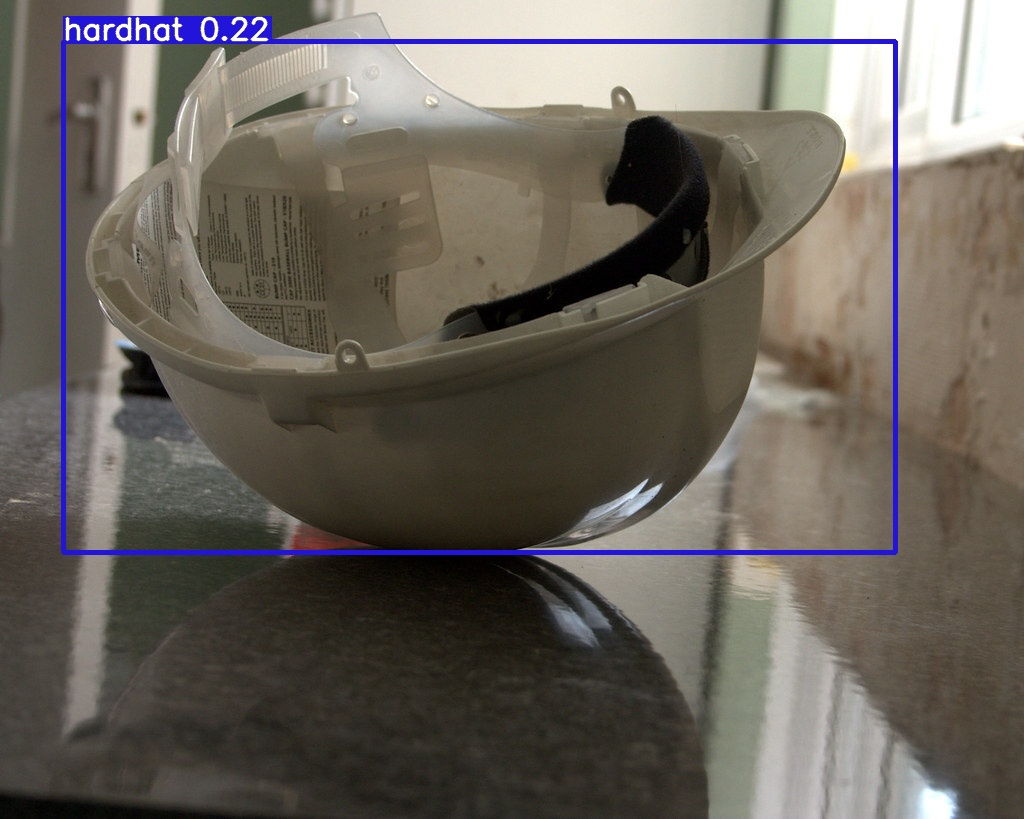

In [ ]:
Image(filename='out_out/1424651198_ed9db3653d_b.jpg', width=600)

### Video to Frames - ffmeg

In [ ]:
! mkdir yolovid
! ffmpeg -i /content/yolo_vid_trimmed.mp4 yolovid/image-%03d.jpg

mkdir: cannot create directory ‘yolovid’: File exists
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-

### Inference on frames

In [ ]:
! mkdir yolovid_out
! python detect.py --conf-thres 0.25 --output yolovid_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.25, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='yolovid_out', save_txt=False, source='yolovid', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

Model Summary: 225 layers, 6.25895e+07 parameters, 6.25895e+07 gradients
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
image 1/317 yolovid/image-001.jpg: 320x512 2 hardhats, 2 vests, Done. (0.033s)
image 2/317 yolovid/image-002.jpg: 320x512 2 hardhats,

### Inferred frames to Video

In [ ]:
! ffmpeg -i yolovid_out/image-%03d.jpg video.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib